In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt


# Now, I think I have ~60% of the task done

In [2]:
class Player:
    
    def __init__(self, name, L):
        self.L = L
        self.L2 = L*L
        self.name = name
        self.matmain = np.full((L, L), -1)
        self.matrecord = np.zeros((L, L), dtype=int) #your register of choices regard attacks in the opponent
        self.alreadyhit = []

    def initialize_mat(self,n0,n1): 
        aux0 = np.zeros((n0), dtype=int)
        aux1 = np.ones((n1), dtype=int)
        full = np.concatenate( (aux0,aux1), axis=None)
        np.random.shuffle(full)
        self.matmain = np.reshape(full , (L, L)) 


    def attack(self,obj_opp): 
        
        x1_opp,y1_opp = np.where( obj_opp.matmain==1) 
        #print('x1_opp:', x1_opp) 
        #print('y1_opp:', y1_opp) 
        
        # Now pick  at random (x,y)  from your board of choices self.matrecord == 0 (you haven't chosen previously)
        x0_choices, y0_choices = np.where( self.matrecord==0 ) 
        chosen = rd.randint(0,len(x0_choices)-1)                         
        
        # compare with (x1_opp,y1_opp) from the board of ships of the opponent                
        #print( x0_choices[chosen], x0_choices[chosen] in x1_opp )
        #print( y0_choices[chosen], y0_choices[chosen] in y1_opp ) 

        x = x0_choices[chosen]
        y = y0_choices[chosen]

        # In this minimal version you always change 0 ---> -1 in your board of choices
        #self.matrecord[x,y] = 1

        if obj_opp.matmain[x,y] == 1: 
            #print('you hitted', obj_opp.matmain[x,y], "(x,y)=", x,y )
            # the opponent changes 1 ---> 0 in his board obj_opp.matmain 
            obj_opp.matmain[x,y] = 0
            # you change 0 ---> 1 in your board of choices       
            self.matrecord[x,y] = 1
        else: 
            #print('you missed', obj_opp.matmain[x,y], "(x,y)=", x,y )
            # you change 0 ---> -1 in your board of choices       
            self.matrecord[x,y] = -1 
            
            


    def plot_board(self, nattack, nplot):
        N = 2
        plt.subplot(1,2,nplot)
        plt.imshow( self.matmain, cmap=plt.cm.get_cmap('Blues', N), origin='lower')
        plt.colorbar(ticks=range(N))
        plt.clim(-0.5, N - 0.5)     
        plt.xticks([]),plt.yticks([])
        plt.title("Board of %s after %d attacks"%(self.name, nattack) )



 --------------------------- Declarations and initializaions --------------------------- 
 --------------------------- Dynamics of alternating attacks --------------------------- 
 --------------------------- see the results --------------------------- 


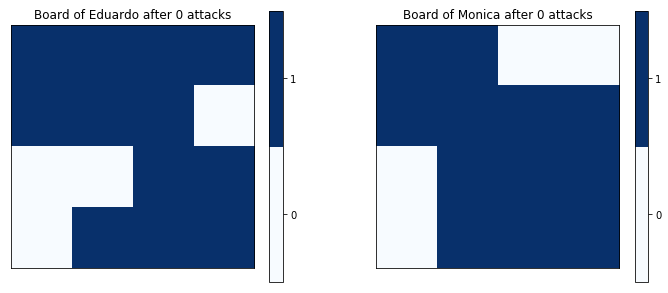

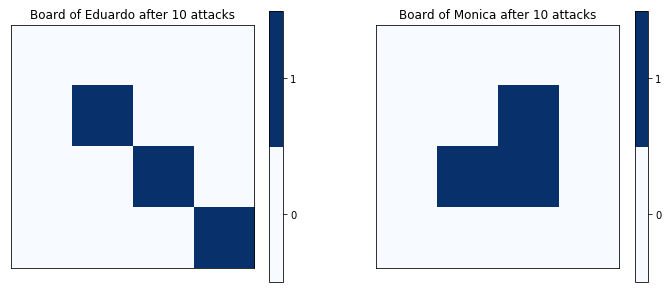

In [3]:
      
print(' --------------------------- Declarations and initializaions --------------------------- ')
L  = 4
n1 = 12
n0 = L*L - n1
nattack = 10

obj1 = Player('Eduardo',L)
obj2 = Player('Monica',L)

obj1.initialize_mat( n0,n1 )
obj2.initialize_mat( n0,n1 )

plt.figure(figsize=(12,5))
obj1.plot_board(0,nplot=1)
obj2.plot_board(0,nplot=2)

print(' --------------------------- Dynamics of alternating attacks --------------------------- ')
# Here I set the number of attack <= n1 . The winner is the player with more hits
for i in range(nattack):
    # 1 attacks 2
    obj1.attack(obj2)
    # 2 attacks 1
    obj2.attack(obj1)    

print(' --------------------------- see the results --------------------------- ')

plt.figure(figsize=(12,5))
obj1.plot_board(nattack,nplot=1)
obj2.plot_board(nattack,nplot=2)
